# Heart failure Prediction using Machine Learning Algorithm

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [260]:
data = pd.read_csv(r'D:\Users\Dell\Desktop\heart.csv')

In [261]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [262]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [263]:
data.shape

(918, 12)

In [264]:
#info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
#descriptive statistics
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [234]:
#checking null values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [265]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [266]:
data.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [227]:
# code for bar plot
def plot_bar_disease(df,col,target,title,color="y"):
    plt.style.use("seaborn-whitegrid")
    xcol = df[col].unique()
    ycol = []
    for val in xcol:
        ycol.append(df[col].loc[(df[col]==val) & (df[target]==1)].count())
    fig, ax = plt.subplots(figsize=(10,8))
    ax.bar(xcol,ycol,color=color)
    ax.set(title=title,xlabel=col,ylabel=target)

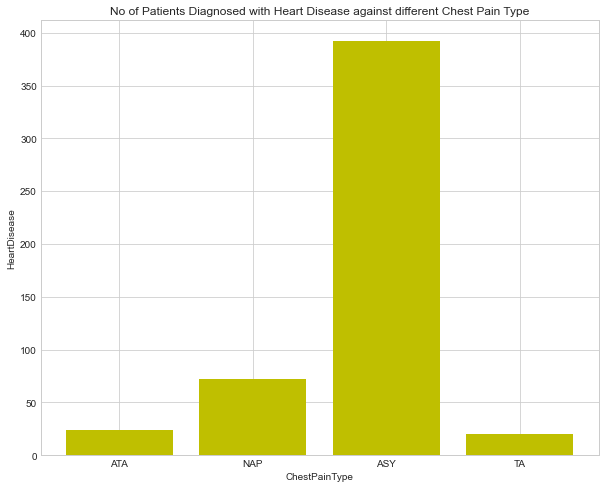

In [267]:
plot_bar_disease(data,"ChestPainType","HeartDisease","No of Patients Diagnosed with Heart Disease against different Chest Pain Type")

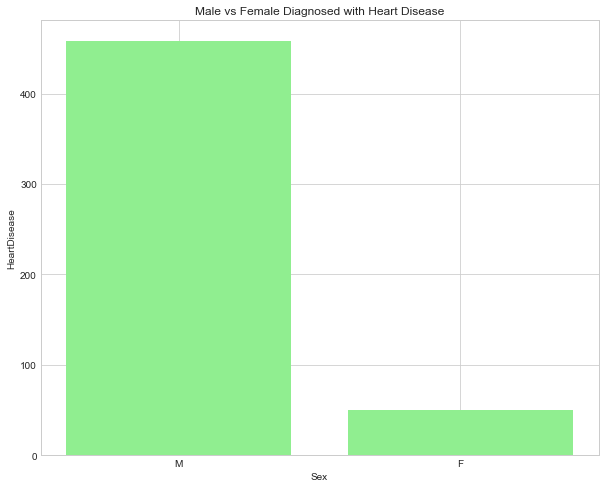

In [31]:
plot_bar_disease(data,"Sex","HeartDisease","Male vs Female Diagnosed with Heart Disease","lightgreen")

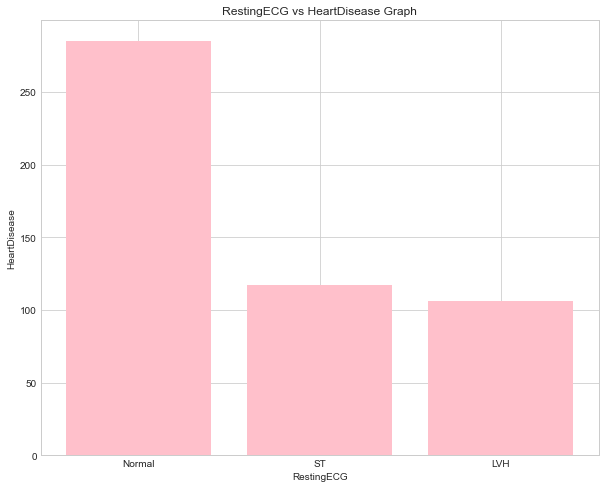

In [34]:
plot_bar_disease(data,"RestingECG","HeartDisease","RestingECG vs HeartDisease Graph","pink")

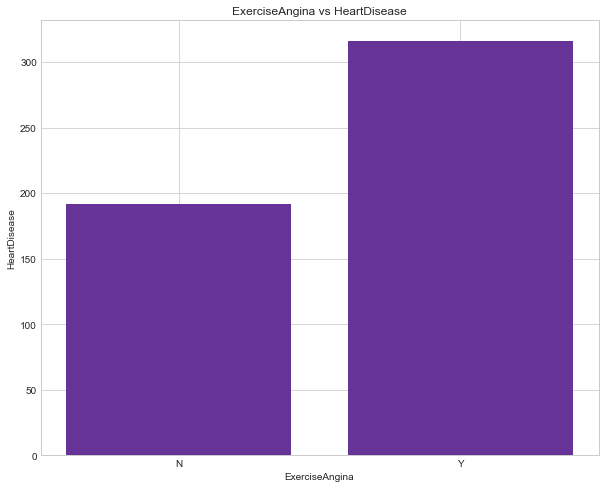

In [35]:
plot_bar_disease(data,"ExerciseAngina","HeartDisease","ExerciseAngina vs HeartDisease","rebeccapurple")


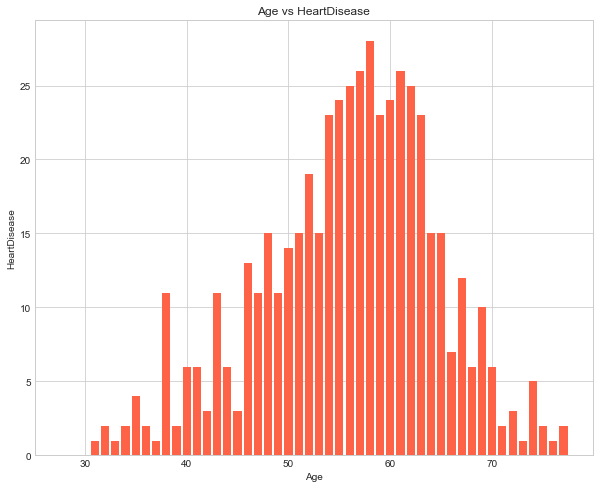

In [36]:
plot_bar_disease(data,"Age","HeartDisease","Age vs HeartDisease","tomato")


In [40]:
def plot_scatter_disease(df,col1,col2,target,cmap):
    fig, ax = plt.subplots(figsize=(10,8))
    scatter = ax.scatter(df[col1],df[col2],c=df[target],cmap=cmap)
    ax.set(title=(col1+ " vs "+col2),xlabel = col1, ylabel = col2)
    ax.legend(*scatter.legend_elements(), title=target)

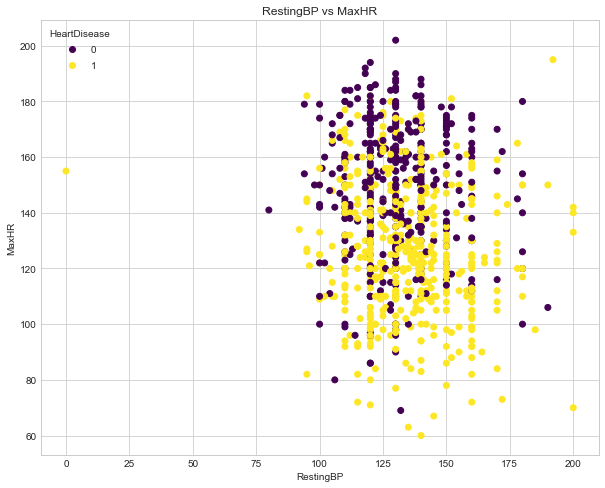

In [268]:
plot_scatter_disease(data,"RestingBP", "MaxHR", "HeartDisease", "viridis")


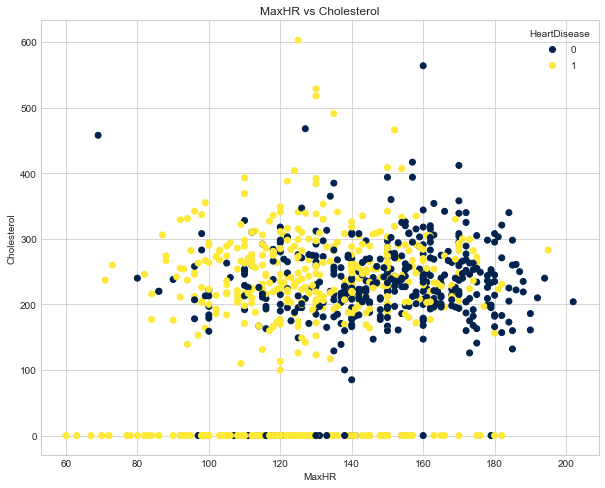

In [228]:
plot_scatter_disease(data,"MaxHR","Cholesterol","HeartDisease","cividis")


In [43]:
data["Cholesterol"].loc[data["Cholesterol"]==0].count()

172

In [44]:
data["RestingBP"].loc[data["RestingBP"]==0].count()

1

## train and test the data

In [54]:
from sklearn.model_selection import train_test_split

In [238]:
# independent features
X=data.drop(columns = 'HeartDisease')
X=pd.get_dummies(X)


In [269]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [270]:
# dependent feature
y = data ['HeartDisease']

In [271]:
y.head(10)

0    0
1    1
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: HeartDisease, dtype: int64

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 40)

In [274]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
658,46,101,197,1,156,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
501,63,130,308,0,138,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
907,44,120,169,0,144,2.8,0,1,1,0,0,0,0,1,0,0,1,1,0,0
366,61,150,0,0,117,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
812,54,110,214,0,158,1.6,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [275]:
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
342,61,110,0,1,113,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
830,41,130,204,0,172,1.4,1,0,0,1,0,0,1,0,0,1,0,0,0,1
455,59,154,0,0,131,1.5,0,1,1,0,0,0,0,0,1,0,1,0,0,1
745,63,108,269,0,169,1.8,1,0,1,0,0,0,0,1,0,0,1,0,1,0
591,58,100,213,0,110,0.0,0,1,1,0,0,0,0,0,1,1,0,0,0,1


In [276]:
y_train.head()

658    0
501    1
907    1
366    1
812    0
Name: HeartDisease, dtype: int64

In [277]:
y_test.head()

342    1
830    0
455    0
745    1
591    0
Name: HeartDisease, dtype: int64

In [278]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

In [280]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model building

#### Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.  
#### Random Forest Algorithm is that it can handle the data set containing continuous variables as in the case of regression and categorical variables as in the case of classification.
#### Random Forest is Bagging technique
####  Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting.

In [281]:
# Fitting Random Forest Classifier to the dataset
# import the Classifier
from sklearn.ensemble import RandomForestClassifier

# create Classifier object
Classifier = RandomForestClassifier(n_estimators = 100, random_state = 20)

# fit the Classifier with x and y data
Classifier.fit(X, y)


RandomForestClassifier(random_state=20)

In [282]:

y_pred=Classifier.predict(X_test)

In [283]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [284]:
y_test=np.array(y_test)
y_pred=np.array(y_pred)

In [285]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]

In [286]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 56  19]
 [  3 106]]


0.8804347826086957

In [259]:
recall_score(y_test,y_pred)

0.9724770642201835

In [223]:
precision_score(y_test,y_pred)

0.848

In [224]:
f1_score(y_test,y_pred)

0.9059829059829061